*Colormap of the notebook:*

* <span style="color:red">assignment problem</span>. The red color indicates the task that should be done
* <span style="color:green">debugging</span>. The green tells you what is expected outcome. Its primarily goal to help you get the correct answer
* <span style="color:blue">hints</span>.

Assignment 2 ( Cifar10 dataset )
======================


<span style="color:red"> do in the terminal: </span>  

<span style="color:red"> 1. go the folder 'data' where assigments are </span>  
<pre> > cd $ASSIGNMENT_DIR$/data </pre>
<span style="color:red"> 2. get the data and perform train/test partition [YOU NEED ~ 300 MB FREE] </span>  
<pre> > chmod +x get_cifar10_dataset.sh </pre>
<pre> > ./get_cifar10_dataset.sh </pre>

In [1]:
# Display the associated webpage in a new window
import IPython
url = 'https://www.cs.toronto.edu/~kriz/cifar.html'
iframe = '<iframe src=' + url + ' width="100%" height=500></iframe>'
IPython.display.HTML(iframe)

##### Preliminaries

In [2]:
# for compatability issues 
from __future__ import print_function
from __future__ import division

In [3]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
# torch stuff
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
# local 
from src.cifar10_utils import load_CIFAR10

In [6]:
# to make interactive plotting possible
%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

### Dataset

In [7]:
# path to the data
path_data = "data"
cifar10_dir = os.path.join(path_data, 'cifar-10-batches-py')

Let's look at the data

<img src="fig/take-a-look.jpg" style="height:256px;" />

### Classes

In [8]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
print("There are " + str(len(classes)) + " classes:")
print(classes)

There are 10 classes:
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


### Load data

In [10]:
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

### Random image

In [11]:
indx_im = np.random.randint(50000)

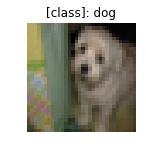

In [12]:
im = X_train[indx_im,:,:,:]
plt.figure(figsize=(2, 2))
plt.imshow(im.astype('uint8'))
plt.title("[class]: %s" % classes[y_train[indx_im]]);
plt.axis('off');

### Shape, size, ...

In [13]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [14]:
n_train = y_train.shape[0]
n_test = y_test.shape[0]

### Look more closely 

<span style="color:red"> You are invited to play with code below  </span>  

<span style="color:red"> - change 'samples_per_class' </span>  
<span style="color:red"> - make different runs, you should see different images </span>  

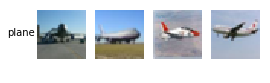

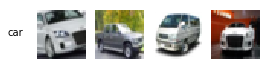

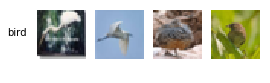

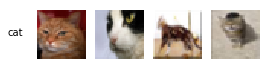

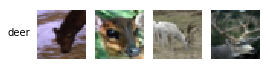

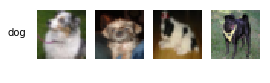

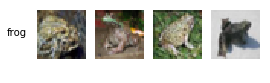

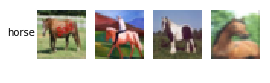

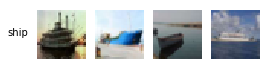

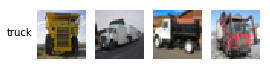

In [15]:
samples_per_class = 4
classes_to_see = np.arange(0,10)
for cls in classes_to_see:
    class_images = np.random.choice(np.arange(n_train)[y_train == cls], samples_per_class, replace=False)
    
    plt.figure(figsize=(1 * samples_per_class, 2))    
    for i, indx_im in enumerate(class_images):
        plt_idx = i + 1
        plt.subplot(1, samples_per_class, plt_idx)
        
        im = X_train[indx_im,:,:,:].astype('uint8')
        
        plt.imshow(im)
        plt.axis('off')
        if i == 0:
            plt.text(-20, 16, classes[cls])

### Transformations

It is common in Computer Vision to make different image transforms.  
*pytorch* (*torchvision* to be more precise) provides several commonly used transforms and tools to combine these transforms.

Please visit for details
https://github.com/pytorch/vision#transforms

Let's check different transformations

First we define useful functions:

In [16]:
def tensor2im(tensor_):
    """ Bring the tensor back to image"""
    return transforms.ToPILImage()(tensor_)

def display_diff(im, im_transformed):
    """ Display a difference between original image and transformed"""
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    plt.imshow(im)
    plt.title('original')
    plt.subplot(1, 2, 2)
    plt.imshow(im_transformed)
    plt.title('transformed') 

* pick an image

In [17]:
indx_im = np.random.randint(50000)
im = X_train[indx_im,:,:,:] 
# 'im' now is a numpy array, will make it an image (PIL.image)
print(type(im))
im = Image.fromarray(im.astype('uint8'))
print(type(im))

<class 'numpy.ndarray'>
<class 'PIL.Image.Image'>


* define transform itself

In [18]:
transform = transforms.Compose([
    transforms.CenterCrop(20),
    transforms.RandomHorizontalFlip(),
])

In words we define the following transformation:  
1. crop the image at the center to have a region of the given size (20 in our case)
2. randomly horizontally flips the given image with a probability of 0.5 (probability by default)

* apply transform and check the difference

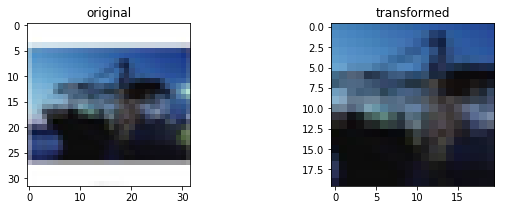

In [19]:
# apply transform
im_transformed = transform(im)
# display results
display_diff(im, im_transformed)

<span style="color:red"> **[PROBLEM I]**: </span> 

<span style="color:red">Define the following transform </span>  
<span style="color:red">1. crop the image at a random location to have a region of the given size (24)</span>  
<span style="color:blue">use 'RandomCrop'    https://github.com/pytorch/vision#randomcropsize-padding0</span>    
<span style="color:red">2. randomly horizontally flip the given image with a probability of 0.5 </span>  
<span style="color:red">3. rescale the input image to the given 'size' (32) </span>  
<span style="color:blue"> consider to use 'Scale' https://github.com/pytorch/vision#scalesize-interpolationimagebilinear </span>  

<span style="color:red"> apply this transform and see the results </span> 

In [20]:
#YOUR CODE HERE
transform = transforms.Compose([
    transforms.RandomCrop(24),
    transforms.RandomHorizontalFlip(),
    transforms.Scale(32)
])
# apply transform
im_transformed = transform(im)
# display results
display_diff(im, im_transformed)

Another interesting tranformation is normalization, commonly used to normalize an image, prior to training  
It operates on a Tensor rather than an image and requires two params - mean & std

In [22]:
im_mean = [0.5, 0.5, 0.5]
im_std = [0.3, 0.3, 0.3]

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=im_mean, std=im_std)
])

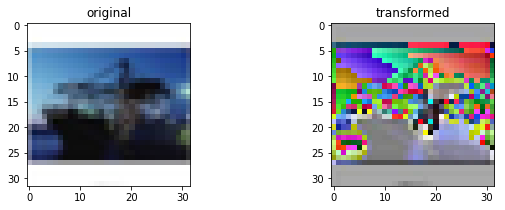

In [23]:
# apply transform
tensor_transformed = transform(im)
# convert tensor to image
im_transformed = tensor2im(tensor_transformed)
# display results
display_diff(im, im_transformed)

<span style="color:red"> **[PROBLEM II]**: </span> 

<span style="color:red">Implement the function, which makes inverse transformation</span>

<span style="color:blue">look at realization of 'normalize' transform in</span>   https://github.com/pytorch/vision/blob/master/torchvision/transforms.py#L129  
<span style="color:blue"> consider to use in-place version of tensor operations as in the example of 'normalize' transform above </span>   

In [2]:
def unnormalize(tensor, mean, std):    
    """
    Make inverse transform to 'normalize'
    
    Args:
        tensor (torch.Tensor): Tensor to unnormalize
        mean (sequence)      : Sequence of means for R, G, B channels respectively.
        std (sequence)       : Sequence of standard deviations for R, G, B channels respectively.  
        
    Returns:
        torch.Tensor: unnormalized tensor.
    """
    #YOUR CODE HERE
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor 

### Datasets and data loaders

To work with datasets pytorch provides useful abstractions, like *dataset* and *dataloder* [https://github.com/pytorch/vision#datasets].  
There are 
* prepared datasets, like MNIST, CIFAR10 and CIFAR100, COCO, etc.
* *ImageFolder* dataset, which allows you to cook dataset for yourself without much efforts.


The former is used here for Cifar10 dataset.
The later is especially useful when working with new data.

On top of the *dataset* there is *dataloader*.
The *dataloader* is used, as name suggests, to load the data.  
It does that efficiently, with multi-threading, so you should not worry about how to feed you model with the data.

Have a look at src/data_set.py where the *DataSetCifar10* is defined.  
There train & test dataloaders are bundled together, for convinence.

In [32]:
from src.data_set import DataSetCifar10

In [37]:
data_set = DataSetCifar10(path_data, num_dunkeys=4, batch_size=30)

To iterate over train set

In [38]:
data_iter = iter(data_set.loader['train'])

# Mini-batch images and labels.
images, labels = data_iter.next()

print (images.size())
print (labels.size())

torch.Size([30, 3, 32, 32])
torch.Size([30])


To iterate over test set

In [39]:
data_iter = iter(data_set.loader['test'])

# Mini-batch images and labels.
images, labels = data_iter.next()

print (images.size())
print (labels.size())

torch.Size([30, 3, 32, 32])
torch.Size([30])
